<a href="https://colab.research.google.com/github/deepshikharbhardwaj/Deep_Learning/blob/main/Pretrain_USE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/deep-learning-with-pytorch/dlwpt-code.git

Cloning into 'dlwpt-code'...
remote: Enumerating objects: 703, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 703 (delta 7), reused 3 (delta 1), pack-reused 686
Receiving objects: 100% (703/703), 185.80 MiB | 28.11 MiB/s, done.
Resolving deltas: 100% (303/303), done.
Checking out files: 100% (228/228), done.


In [ ]:
from torchvision import models

In [ ]:
dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'MobileNetV3',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mobilenetv2',
 'mobilenetv3',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 '

In [ ]:
alexnet = models.AlexNet()

In [ ]:
resnet = models.resnet101(pretrained=True) #weights downloaded

Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


In [ ]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
from torchvision import transforms
preprocess = transforms.Compose([
transforms.Resize(256),
transforms.CenterCrop(224),
transforms.ToTensor(),
transforms.Normalize(
mean=[0.485, 0.456, 0.406],
std=[0.229, 0.224, 0.225]
)])

In [ ]:
from PIL import Image
img = Image.open("/content/panda.jpg")#"/content/dlwpt-code/data/p1ch2/bobby.jpg")

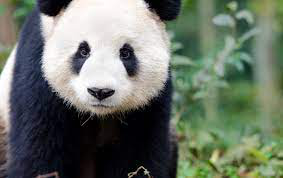

In [ ]:
img

In [ ]:
img_t = preprocess(img)
img_t

tensor([[[ 0.3652,  0.7591,  1.2557,  ..., -1.0048, -1.0733, -1.1247],
         [ 1.0844,  1.3755,  1.6838,  ..., -1.0219, -1.0562, -1.0904],
         [ 1.6838,  1.8550,  1.9749,  ..., -0.9705, -0.9705, -0.9705],
         ...,
         [-2.0837, -2.1008, -2.1008,  ...,  0.5193,  0.5022,  0.4337],
         [-2.0837, -2.1008, -2.1008,  ...,  0.3994,  0.4166,  0.3481],
         [-2.1008, -2.1008, -2.1008,  ...,  0.2967,  0.3481,  0.2967]],

        [[ 0.3627,  0.8179,  1.3256,  ..., -0.3200, -0.3901, -0.4426],
         [ 1.0805,  1.4307,  1.7283,  ..., -0.3375, -0.3901, -0.4251],
         [ 1.6758,  1.9034,  2.0259,  ..., -0.3025, -0.3025, -0.3025],
         ...,
         [-2.0357, -2.0357, -2.0357,  ...,  0.8704,  0.8880,  0.8354],
         [-2.0357, -2.0357, -2.0357,  ...,  0.7829,  0.8179,  0.7829],
         [-2.0357, -2.0357, -2.0357,  ...,  0.6779,  0.7654,  0.7479]],

        [[ 0.4962,  0.9668,  1.4722,  ..., -0.5670, -0.6367, -0.6890],
         [ 1.1759,  1.5420,  1.8557,  ..., -0

In [ ]:
import torch
batch_t = torch.unsqueeze(img_t, 0)

In [ ]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
out = resnet(batch_t)
out

tensor([[-3.2233e-01, -1.3370e+00,  6.1251e-01,  3.6106e-01, -2.1101e+00,
         -6.2106e-01, -2.2708e+00, -1.9468e+00, -1.1439e+00, -5.9684e-01,
         -1.7956e-01,  1.7360e-01, -2.0710e+00, -3.4306e+00, -9.4785e-01,
         -2.6506e+00, -8.1942e-01, -7.2800e-01,  9.4082e-02,  1.2236e+00,
         -4.5048e-01, -8.5243e-01, -3.3752e-01, -2.4918e-01, -2.5069e+00,
         -1.7952e-01, -1.7688e-01, -1.5323e+00, -1.1201e+00,  5.6117e-01,
         -3.2074e+00, -1.5188e+00, -1.2899e+00, -8.2156e-01, -1.2945e-01,
          3.3302e-01,  1.4721e+00, -2.6174e+00, -7.6532e-01, -1.8235e+00,
         -2.8703e+00, -9.3850e-01, -1.0269e+00, -1.7858e+00, -2.0973e+00,
         -1.3159e+00, -2.6137e+00, -1.2581e+00, -1.9499e+00, -5.8719e-01,
         -1.0891e+00, -1.6829e+00, -3.4837e-02, -6.2422e-01, -5.1185e-01,
         -1.6145e+00, -8.4562e-01, -2.0127e-01, -1.5240e+00,  9.5386e-01,
          2.6276e-01,  5.2829e-01,  2.1586e-02,  8.3105e-01,  2.5094e-01,
          2.2031e+00,  5.4572e-01, -3.

In [ ]:
out.shape

torch.Size([1, 1000])

In [ ]:
with open('/content/dlwpt-code/data/p1ch2/imagenet_classes.txt') as f:
  labels = [line.strip('\n') for line in f.readlines()]

In [ ]:
labels

['tench, Tinca tinca',
 'goldfish, Carassius auratus',
 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 'tiger shark, Galeocerdo cuvieri',
 'hammerhead, hammerhead shark',
 'electric ray, crampfish, numbfish, torpedo',
 'stingray',
 'cock',
 'hen',
 'ostrich, Struthio camelus',
 'brambling, Fringilla montifringilla',
 'goldfinch, Carduelis carduelis',
 'house finch, linnet, Carpodacus mexicanus',
 'junco, snowbird',
 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 'robin, American robin, Turdus migratorius',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel, dipper',
 'kite',
 'bald eagle, American eagle, Haliaeetus leucocephalus',
 'vulture',
 'great grey owl, great gray owl, Strix nebulosa',
 'European fire salamander, Salamandra salamandra',
 'common newt, Triturus vulgaris',
 'eft',
 'spotted salamander, Ambystoma maculatum',
 'axolotl, mud puppy, Ambystoma mexicanum',
 'bullfrog, Rana catesbeiana',
 'tree frog, tree-f

In [ ]:
value, index = torch.max(out, 1)

In [ ]:
value, index

(tensor([13.7065], grad_fn=<MaxBackward0>), tensor([388]))

In [ ]:
labels[207]

'golden retriever'

##dim = 1 and then [0]

In [ ]:
percentage = torch.nn.functional.softmax(out, dim = 1)*100  #[1,1000] [1,2,3,4,,5,6,7,8,,5,45,6,345,2,4,23,423,]
print(index.item())
print(labels[index.item()])
print((percentage.shape))
percentage.squeeze(0)[index.item()]

388
giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca
torch.Size([1, 1000])


tensor(98.0781, grad_fn=<SelectBackward>)

In [ ]:
index.item()

388

In [ ]:
_, indices = torch.sort(out, descending = True)
print(indices.shape) #was tensor [1,1000]
indices = indices.squeeze(0)
indices = indices.tolist()
#print(shape(indices))
[(labels[idx], percentage.squeeze(0)[idx].item()) for idx in indices[:5]]

torch.Size([1, 1000])


[('giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca',
  98.07808685302734),
 ('brown bear, bruin, Ursus arctos', 0.5871077179908752),
 ('American black bear, black bear, Ursus americanus, Euarctos americanus',
  0.1261506974697113),
 ('lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens',
  0.10707158595323563),
 ('polecat, fitch, foulmart, foumart, Mustela putorius', 0.0874260812997818)]

#GANs

In [ ]:
import torch
from torch import hub
resnet18_model = hub.load('pytorch/vision:master', 'resnet18', pretrained=True)

In [ ]:
x = torch.tensor([[1,2],
                  [3,4]],dtype=torch.float)
print(torch.nn.functional.softmax(x,dim=0))
# tensor([[0.1192, 0.1192],
#         [0.8808, 0.8808]])
torch.nn.functional.softmax(x,dim=1)
# tensor([[0.2689, 0.7311],
#         [0.2689, 0.7311]])

tensor([[0.1192, 0.1192],
        [0.8808, 0.8808]])


tensor([[0.2689, 0.7311],
        [0.2689, 0.7311]])

In [ ]:
a = torch.tensor([[1,2,3,4]],dtype=torch.float)
torch.nn.functional.softmax(a, dim = 1)

tensor([[0.0321, 0.0871, 0.2369, 0.6439]])